# Belajar Mengolah data

### Mengimport library yang diperlukan
---

- numpy untuk array
- pandas untuk pangolahan data
- matplotlib dan seaborn untuk memvisualisasi data
- scipy untuk algoritma matematika

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

Dataset original dari **_Kaggle_** 

[Download](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [13]:
#megimport file .csv 
data = pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- **Pregnacies** adalah data kehamilan
- **Glucose** adalah tingkat glukosa
- **BloodPressure** adalah tekanan darah
- **Skin Thickness**  adalah ketebalan kulit
- **Insulin** adalah insulin
- **BMI** adalah Body Mass Index
- **DiabetesPredigreeFunction** adalah  ???
- **Age** adalah umur
- **Outcome** tipe boolean (1 true, 0 false)

### Exploratory data analysis
---

Dalam statistik, analisis data eksplorasi adalah pendekatan menganalisis kumpulan data untuk merangkum karakteristik utamanya, sering kali menggunakan grafik statistik dan metode visualisasi data lainnya.

In [5]:
# melihat tipe data
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# statistika deskriptif
# funtion transpose() untuk membalik tabel
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# contoh statistika deskriptif jika tidak menggunakan transpose()
data.describe()

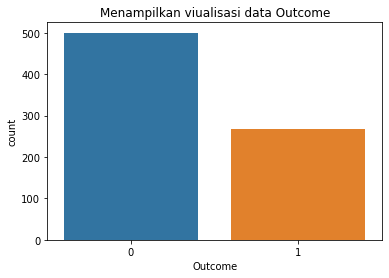

In [7]:
sns.countplot(x=data['Outcome']).set_title('Menampilkan viualisasi data Outcome')
plt.show()

### Preprocessing
---

Merupakan manipulasi atau penurunan data sebelum digunakan untuk memastikan atau meningkatkan kinerja, dan merupakan langkah penting dalam proses penambangan data.

Data yang diolah tidak harus data yang hilang atau kosong, bisa juga data yang nilainya tidak wajar. Misal di dalam kasus ini terdapat kadar glukosa, tekanan darah, dst bernilai 0.

In [14]:
# Me replace nilai tidak wajar sebagai missing value

data['Glucose']=data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)

# menampilkan data setelah di replace

data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### Missing Value
---

Untuk melihat missing value tiap variable 

In [32]:
# fungtion isnull() untuk melihat data yang missing
# function sum() untuk menjumlahkan data yang missing
# function sort_values(ascending = False) untuk mengurutkan dari data yang terbesar

total = data.isnull().sum().sort_values(ascending = False)
print(total)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Sebelum melakukan imputasi pada nilai missing, dicek terlebih dahulu skewness dari data, untuk menentukan imputasi yang tepat

### Skewness
---

skewness adalah ukuran seberapa besar distribusi probabilitas suatu variabel acak menyimpang dari distribusi normal

In [36]:
# Memasukan atribut yang memiliki missing value ke datatr

datatr=['Insulin','SkinThickness','BloodPressure','BMI','Glucose']

# Mengecek skewness data data yang memiliki missing value

data[datatr].skew(axis=0, skipna=True)

Insulin          2.166464
SkinThickness    0.690619
BloodPressure    0.134153
BMI              0.593970
Glucose          0.530989
dtype: float64

_note : dalam skewness ada 2 pendapat. Pertama, dikatakan normal jika hasilnya antara -1 dan 1. Kedua, dikatakan normal jika hasilnya antara -2 dan 2. Jika normal imputasinya menggunaakan mean (rata-rata), jika tidak maka menggunakan median (nilai tengah)._

---

In [42]:
df1=data.loc[data['Outcome']==0]
df2=data.loc[data['Outcome']==1]

In [43]:
df1[datatr].skew(axis=0, skipna=True)

Insulin          2.512829
SkinThickness    0.358207
BloodPressure    0.161298
BMI              0.469779
Glucose          0.654938
dtype: float64

In [44]:
df2[datatr].skew(axis=0, skipna=True)

Insulin          1.886631
SkinThickness    1.427105
BloodPressure    0.077426
BMI              1.020176
Glucose          0.090633
dtype: float64

In [45]:
df1[datatr].describe()

,Insulin,SkinThickness,BloodPressure,BMI,Glucose
count,264.000000,361.000000,481.000000,491.000000,497.000000
mean,130.287879,27.235457,70.877339,30.859674,110.643863
std,102.482237,10.026491,12.161223,6.560737,24.776906
min,15.000000,7.000000,24.000000,18.200000,44.000000
25%,66.000000,19.000000,62.000000,25.600000,93.000000
50%,102.500000,27.000000,70.000000,30.100000,107.000000
75%,161.250000,33.000000,78.000000,35.300000,125.000000
max,744.000000,60.000000,122.000000,57.300000,197.000000


In [46]:
df2[datatr].describe()

,Insulin,SkinThickness,BloodPressure,BMI,Glucose
count,130.000000,180.000000,252.000000,266.000000,266.000000
mean,206.846154,33.000000,75.321429,35.406767,142.319549
std,132.699898,10.327595,12.299866,6.614982,29.599199
min,14.000000,7.000000,30.000000,22.900000,78.000000
25%,127.500000,27.000000,68.000000,30.900000,119.000000
50%,169.500000,32.000000,74.500000,34.300000,140.000000
75%,239.250000,39.000000,84.000000,38.925000,167.000000
max,846.000000,99.000000,114.000000,67.100000,199.000000


---

### Preprocessing
#### Imputasi missing value
---

In [47]:
#imputasi class mean pada attribute Glucose dan Insulin
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
df2['Glucose'].fillna(df2['Glucose'].mean(),inplace=True)

D:\APLIKASI\Anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [52]:
df1['Insulin'].fillna(df1['Insulin'].median(),inplace=True)
df2['Insulin'].fillna(df2['Insulin'].median(),inplace=True)
data2=df1.append(df2)
data2.head()

D:\APLIKASI\Anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,NaN,102.5,25.6,0.201,30,0
7,10,115.0,NaN,NaN,102.5,35.3,0.134,29,0
10,4,110.0,92.0,NaN,102.5,37.6,0.191,30,0


In [57]:
#Imputasi Mean pada bloodpressure, skinthickness, dan BMI
mean1=data2['BloodPressure'].mean()
data2['BloodPressure'].fillna(mean1,inplace=True)
mean2=data2['SkinThickness'].mean()
data2['SkinThickness'].fillna(mean2,inplace=True)
mean3=data2['BMI'].mean()
data2['BMI'].fillna(mean3,inplace=True)

In [58]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.697358,30.462008,44.000,99.75000,117.000000,141.00000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.500000,169.50000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [61]:
#Ckecking Missing Value
total=data2.isnull().sum().sort_values(ascending = False)
print(total)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Outlier

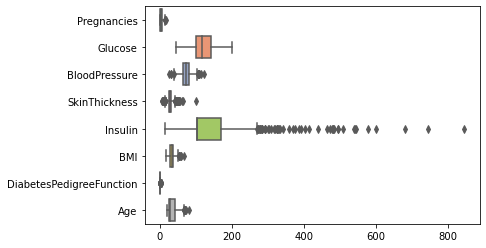

In [73]:
#Cek outlier menggunakan boxplot
datat=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
ax = sns.boxplot(dataa=data2[datat], orient="h", palette="Set2")

In [75]:
ax = sns.boxplot(dataa=datscale[datat], orient="h", palette="Set2")

NameError: name 'datscale' is not defined

# aku ngelu aowkowaoowaokowakokwokowak